In [1]:
import matplotlib.pyplot as plt
import cv2
import pandas as pd

Read dataframe with processed annotations:

In [2]:
import pandas as pd

df = pd.read_csv('annotations/annotations.csv')
df.head()

,id,path,n_segs,lb_seg_rle,lb_seg_flag,sb_seg_rle,sb_seg_flag,st_seg_rle,st_seg_flag,slice_h,slice_w,px_spacing_h,px_spacing_w,case_id,day_num,slice_id
0,case123_day20_slice_0001,./train/case123/case123_day20/scans/slice_0001...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,123,20,1
1,case123_day20_slice_0002,./train/case123/case123_day20/scans/slice_0002...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,123,20,2
2,case123_day20_slice_0003,./train/case123/case123_day20/scans/slice_0003...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,123,20,3
3,case123_day20_slice_0004,./train/case123/case123_day20/scans/slice_0004...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,123,20,4
4,case123_day20_slice_0005,./train/case123/case123_day20/scans/slice_0005...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,123,20,5


Visualize evolution for several days for a given case and slice



... LET'S PLOT SOME IMAGES ...



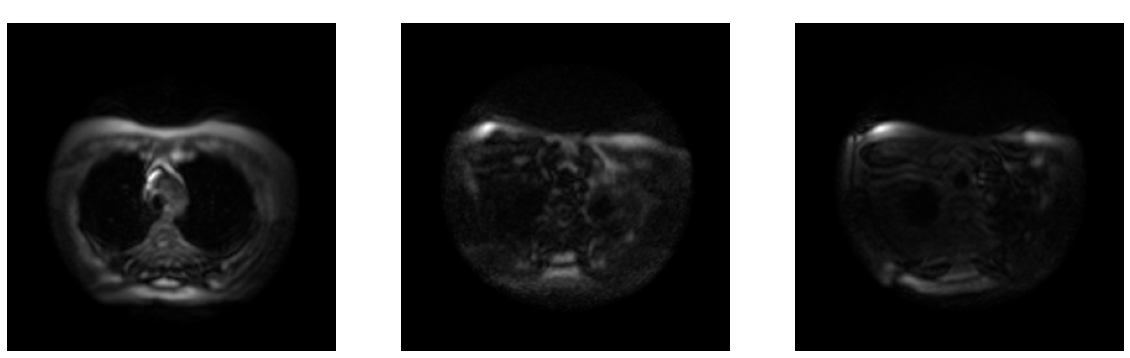

In [3]:
from utils.plot import open_gray16

cases = df['case_id'].unique().tolist()

# choose a case
case = cases[0]

days = sorted(df[(df['case_id']==case)]['day_num'].unique().tolist())

# choose a day
day = days[0]

slices = sorted(df[(df['case_id']==case) & (df['day_num']==day)]['slice_id'].unique().tolist())

# choose a slice
slice = slices[0]

df_plot = df[(df['case_id']==case) & (df['slice_id']==slice)].sort_values(by='day_num').reset_index(drop=True)

print(f"\n\n... LET'S PLOT SOME IMAGES ...\n")

fig, axs = plt.subplots(1, len(df_plot), sharey=True, figsize=(20,20))

for i in range(len(df_plot)):
    axs[i].imshow(open_gray16(df_plot.path[i]), cmap="gray")
    axs[i].axis(False)
    axs[i].set_title(f'day {df_plot.day_num[i]}', color='white')

Choose a case with tissues

In [4]:
case = 123
day = 0
slice = 75

df_tissue = df[(df['case_id']==case) & (df['slice_id']==slice)].sort_values(by='day_num').reset_index(drop=True)
df_tissue

,id,path,n_segs,lb_seg_rle,lb_seg_flag,sb_seg_rle,sb_seg_flag,st_seg_rle,st_seg_flag,slice_h,slice_w,px_spacing_h,px_spacing_w,case_id,day_num,slice_id
0,case123_day0_slice_0075,./train/case123/case123_day0/scans/slice_0075_...,3,17471 16 17735 20 18000 23 18264 26 18529 28 1...,True,25960 3 26220 12 26485 16 26704 13 26750 18 26...,True,15568 12 15833 16 16096 20 16360 24 16625 26 1...,True,266,266,1.5,1.5,123,0,75
1,case123_day20_slice_0075,./train/case123/case123_day20/scans/slice_0075...,2,23058 4 23323 6 23588 8 23854 9 24119 10 24385...,True,NaN,False,12388 11 12652 14 12916 18 13180 22 13445 24 1...,True,266,266,1.5,1.5,123,20,75
2,case123_day22_slice_0075,./train/case123/case123_day22/scans/slice_0075...,2,24922 2 25187 5 25452 7 25718 7 25984 8 26250 ...,True,NaN,False,15313 14 15578 17 15842 20 16107 23 16372 25 1...,True,266,266,1.5,1.5,123,22,75




... LET'S PLOT THE 3 SEGMENTATION MASKS ...



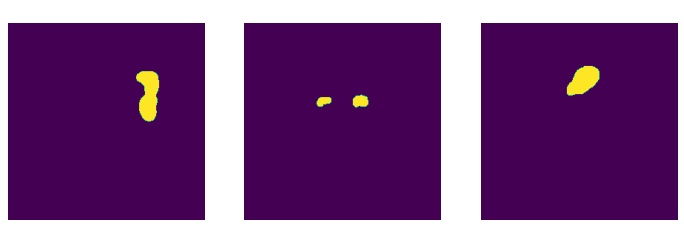

In [5]:
from utils.plot import rle_decode

def short2long(seg_short):
    """ short to long string """
    segs = {"lb": "large bowel",
            "sb": "small bowel",
            "st": "stomach"}
    return segs[seg_short] 

demo_ex = df_tissue.iloc[0]

masks = [i for i in ["lb", "sb", "st"] if not pd.isna(demo_ex[f"{i}_seg_rle"])]

print(f"\n\n... LET'S PLOT THE 3 SEGMENTATION MASKS ...\n")

fig, axs = plt.subplots(1, len(masks), figsize=(12,12))

for i, _seg_type in enumerate(masks):
    
    axs[i].imshow(rle_decode(demo_ex[f"{_seg_type}_seg_rle"], shape=(demo_ex.slice_w, demo_ex.slice_h), color=1))
    axs[i].set_title(f"RLE Encoding for {short2long(_seg_type)}", fontweight="bold", color='white')
    axs[i].axis(False)



... LET'S PLOT THE IMAGE WITH AN RGB SEGMENTATION MASK OVERLAY ...



(-0.5, 265.5, 265.5, -0.5)

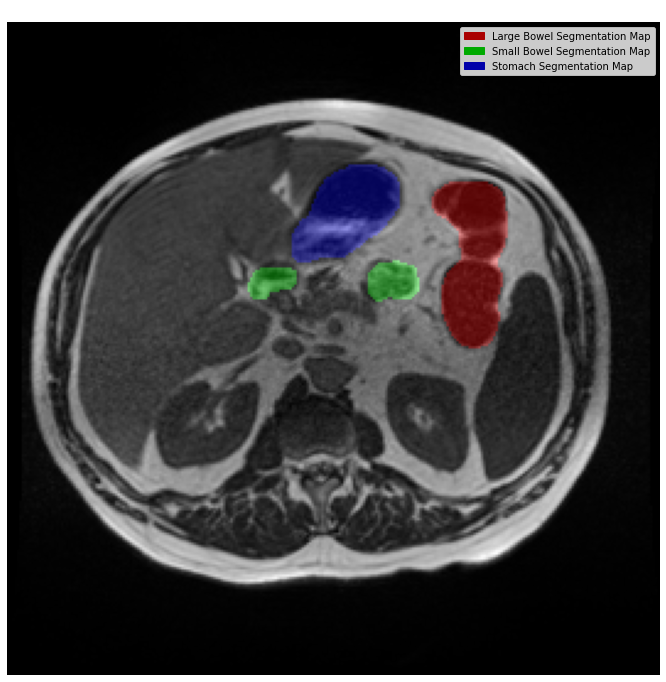

In [7]:
from matplotlib.patches import Rectangle
import numpy as np

print(f"\n\n... LET'S PLOT THE IMAGE WITH AN RGB SEGMENTATION MASK OVERLAY ...\n")

# We need to normalize the loaded image values to be between 0 and 1 or else our plot will look weird
_img = open_gray16(demo_ex.path, to_rgb=True)
_img = ((_img-_img.min())/(_img.max()-_img.min())).astype(np.float32)
_seg_rgb = np.stack([rle_decode(demo_ex[f"{_seg_type}_seg_rle"], shape=(demo_ex.slice_w, demo_ex.slice_h), color=1) if not pd.isna(demo_ex[f"{_seg_type}_seg_rle"]) else np.zeros((demo_ex.slice_w, demo_ex.slice_h)) for _seg_type in ["lb", "sb", "st"]], axis=-1).astype(np.float32)
seg_overlay = cv2.addWeighted(src1=_img, alpha=0.99, 
                              src2=_seg_rgb, beta=0.33, gamma=0.0)

plt.figure(figsize=(12,12))
plt.imshow(seg_overlay)
plt.title(f"Segmentation Overlay For ID: {demo_ex.id}", fontweight="bold", color="white")

handles = [Rectangle((0,0),1,1, color=_c) for _c in [(0.667,0.0,0.0), (0.0,0.667,0.0), (0.0,0.0,0.667)]]
labels = ["Large Bowel Segmentation Map", "Small Bowel Segmentation Map", "Stomach Segmentation Map"]
plt.legend(handles,labels)
plt.axis(False)

In [8]:
print(f"\n\n... LET'S PRINT THE RELEVANT INFORMATION ...\n")
print(f"\t--> IMAGE CASE ID              : {demo_ex.case_id}")
print(f"\t--> IMAGE DAY NUMBER           : {demo_ex.day_num}")
print(f"\t--> IMAGE SLICE WIDTH          : {demo_ex.slice_w}")
print(f"\t--> IMAGE SLICE HEIGHT         : {demo_ex.slice_h}")
print(f"\t--> IMAGE PIXEL SPACING WIDTH  : {demo_ex.px_spacing_w}")
print(f"\t--> IMAGE PIXEL SPACING HEIGHT : {demo_ex.px_spacing_h}")

print("\n\n... SINGLE ID EXPLORATION FINISHED ...\n\n")



... LET'S PRINT THE RELEVANT INFORMATION ...

	--> IMAGE CASE ID              : 123
	--> IMAGE DAY NUMBER           : 0
	--> IMAGE SLICE WIDTH          : 266
	--> IMAGE SLICE HEIGHT         : 266
	--> IMAGE PIXEL SPACING WIDTH  : 1.5
	--> IMAGE PIXEL SPACING HEIGHT : 1.5


... SINGLE ID EXPLORATION FINISHED ...


